# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [164]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

## Parte 1

### _Setup_ da parte 1

In [165]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [166]:
dataframe

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21
...,...,...
9995,25.204408,22
9996,12.006620,24
9997,17.178733,17
9998,21.983062,23


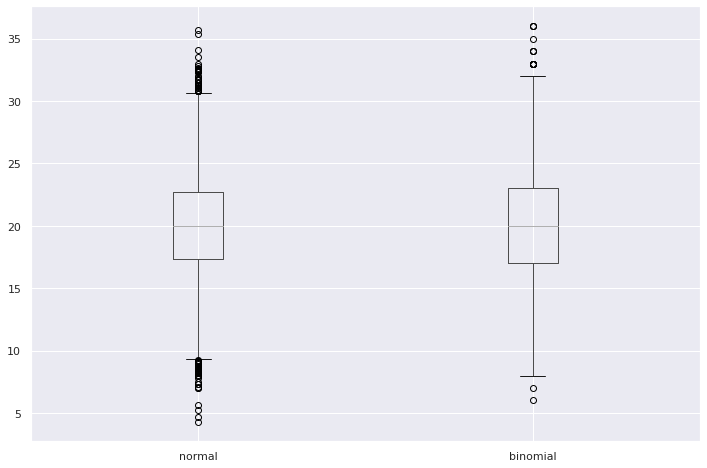

In [167]:
# Sua análise da parte 1 começa aqui.
boxplot = dataframe.boxplot(column=['normal', 'binomial'])
boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa89ef9ff60>,
      dtype=object)

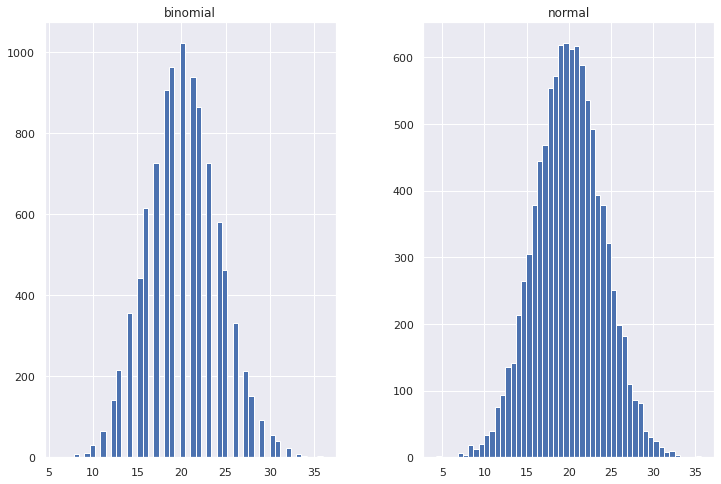

In [168]:
 dataframe.hist(bins=50)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [241]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q1_norm = dataframe.describe()['normal']['25%']
    q1_binom = dataframe.describe()['binomial']['25%']

    q2_norm = dataframe.describe()['normal']['50%']
    q2_binom = dataframe.describe()['binomial']['50%']

    q3_norm = dataframe.describe()['normal']['75%']
    q3_binom = dataframe.describe()['binomial']['75%']
    
    delta_1 = round(q1_norm - q1_binom, 3)
    delta_2 = round(q2_norm - q2_binom, 3)
    delta_3 = round(q3_norm - q3_binom, 3)
    
    return (float(delta_1), float(delta_2), float(delta_3))

In [242]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [238]:
def q2():
    # Retorne aqui o resultado da questão 2.
    ecdf = ECDF(dataframe['normal'])

    std_norm = dataframe.describe()['normal']['std']

    mean_norm = dataframe.describe()['normal']['mean']

    prob = ecdf([mean_norm - std_norm, mean_norm + std_norm])

    return float(round(prob[1] - prob[0], 3))
    

In [240]:
q2()

0.684

In [173]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [235]:
def q3():

    from statistics import pvariance

    # Retorne aqui o resultado da questão 3.
    m_binom = dataframe.describe()['binomial']['mean']
    v_binom = pvariance(dataframe['binomial'])

    m_norm = dataframe.describe()['normal']['mean']
    v_norm = pvariance(dataframe['normal'])

    delta_1 = round(m_binom - m_norm, 3)
    delta_2 = round(v_binom - v_norm, 3)

    return (float(delta_1), float(delta_2))

In [237]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [176]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#"gdrive/My Drive/codenation/codenation/data-science-1/pulsar_stars.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [177]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [178]:
# Sua análise da parte 2 começa aqui.
stars.loc[(stars['target'] == False), 'target'] = 0
stars.loc[(stars['target'] == True), 'target'] = 1
stars

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [245]:
def get_false_pulsar_mean_profile_standardized():

    false_pulsar_mean_profile_standardized = stars.loc[stars['target'] == 0, 'mean_profile']

    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile_standardized - false_pulsar_mean_profile_standardized.mean()) / false_pulsar_mean_profile_standardized.std()

    return false_pulsar_mean_profile_standardized
    

def q4():
    # Retorne aqui o resultado da questão 4.
    false_pulsar_mean_profile_standardized = get_false_pulsar_mean_profile_standardized()

    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    q08 = sct.norm.ppf(0.80, loc=0, scale=1)
    q09 = sct.norm.ppf(0.90, loc=0, scale=1)
    q95 = sct.norm.ppf(0.95, loc=0, scale=1)

    p08 = round(ecdf([q08])[0], 3)
    p09 = round(ecdf([q09])[0], 3)
    p95 = round(ecdf([q95])[0], 3)

    return (float(p08), float(p09), float(p95))

In [246]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [243]:
def q5():
    # Retorne aqui o resultado da questão 5.

    false_pulsar_mean_profile_standardized = get_false_pulsar_mean_profile_standardized()

    Q1_pulsar = false_pulsar_mean_profile_standardized.describe()['25%']

    Q2_pulsar = false_pulsar_mean_profile_standardized.describe()['50%']

    Q3_pulsar = false_pulsar_mean_profile_standardized.describe()['75%']

    q1 = sct.norm.ppf(0.25, loc=0, scale=1)
    
    q2 = sct.norm.ppf(0.5, loc=0, scale=1)
    
    q3 = sct.norm.ppf(0.75, loc=0, scale=1)
    
    delta1 = round(Q1_pulsar - q1, 3)

    delta2 = round(Q2_pulsar - q2, 3)

    delta3 = round(Q3_pulsar - q3, 3)

    return (float(delta1), float(delta2), float(delta3))

In [244]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.